# Sebastian Sarmiento-Saher: Capstone

Finding New Revenue Opportunities for LendingTree (LT) Bank

## Import libraries and dataset

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [3]:
df = pd.read_csv('LT_wkbk_Dec12v1_python.csv')

## Create new variables

The objective is to slice the data and create new groups (variables) based on specific attributes. The first set will be based on what the borrowers' credit (FICO) scores are in the following ranges:

* Excellent: 780 and above
* Good: 660 to 779
* Fair: 600 to 659 
* Poor: 500 to 599
* Very Poor: Below 500

The second set will be based on what interest rates the borrowers are paying in the following ranges:

* Lowest: Below 10%
* Low-med: 10% to 14.99%
* Medium: 15% to 19.99%
* Med-high: 20% to 24.99%
* High: 25% to 29.99%
* Highest: 30% and above

The third set will create sub-groups that combine the above. For example, someone with "Excellent" credit and paying Medium interest would be in the Ex_med group.

In [4]:
# Assigning borrowers to groups based on their credit (FICO) score and the interest rate they're paying. 
# These groups will be called the "FICO groups" and "Interest groups" 
# First, I am creating the FICO groups

# FICO group conditions
FICO_groups = [
    (df['fico_score'] >= 0) & (df['fico_score'] < 500),
    (df['fico_score'] >= 500) & (df['fico_score'] < 600),
    (df['fico_score'] >= 600) & (df['fico_score'] < 660),
    (df['fico_score'] >= 660) & (df['fico_score'] < 780),
    (df['fico_score'] >= 780)
]

# FICO group values
FICO_values = ['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']

# FICO group column
df['FICO_code'] = np.select(FICO_groups, FICO_values)

# Next: creating the Interest groups

# Interest group conditions
Interest_groups = [
    (df['int_rate'] >= 0) & (df['int_rate'] < 10),
    (df['int_rate'] >= 10) & (df['int_rate'] < 15),
    (df['int_rate'] >= 15) & (df['int_rate'] < 20),
    (df['int_rate'] >= 20) & (df['int_rate'] < 25),
    (df['int_rate'] >= 25) & (df['int_rate'] < 30),
    (df['int_rate'] >= 30)
]

# Interest group values
Interest_values = ['Lowest', 'Low-med', 'Medium', 'Med-high', 'High', 'Highest']

# Interest column
df['Interest_code'] = np.select(Interest_groups, Interest_values)

# Finally: grouping borrowers by their respective FICO and Interest groups. 
# For example: someone with "Good" credit and paying "Medium" interest rates would be in the Gd_med subgroup.

# Grouping FICO groups by Interest groups
FICOxInterest_groups = [
    (df['FICO_code'] == 'Excellent') & (df['Interest_code'] == 'Lowest'),
    (df['FICO_code'] == 'Excellent') & (df['Interest_code'] == 'Low-med'),
    (df['FICO_code'] == 'Excellent') & (df['Interest_code'] == 'Medium'),
    (df['FICO_code'] == 'Excellent') & (df['Interest_code'] == 'Med-high'),
    (df['FICO_code'] == 'Excellent') & (df['Interest_code'] == 'High'),
    (df['FICO_code'] == 'Excellent') & (df['Interest_code'] == 'Highest'),
    (df['FICO_code'] == 'Good') & (df['Interest_code'] == 'Lowest'),
    (df['FICO_code'] == 'Good') & (df['Interest_code'] == 'Low-med'),
    (df['FICO_code'] == 'Good') & (df['Interest_code'] == 'Medium'),
    (df['FICO_code'] == 'Good') & (df['Interest_code'] == 'Med-high'),
    (df['FICO_code'] == 'Good') & (df['Interest_code'] == 'High'),
    (df['FICO_code'] == 'Good') & (df['Interest_code'] == 'Highest'),
    (df['FICO_code'] == 'Fair') & (df['Interest_code'] == 'Lowest'),
    (df['FICO_code'] == 'Fair') & (df['Interest_code'] == 'Low-med'),
    (df['FICO_code'] == 'Fair') & (df['Interest_code'] == 'Medium'),
    (df['FICO_code'] == 'Fair') & (df['Interest_code'] == 'Med-high'),
    (df['FICO_code'] == 'Fair') & (df['Interest_code'] == 'High'),
    (df['FICO_code'] == 'Fair') & (df['Interest_code'] == 'Highest'),
    (df['FICO_code'] == 'Poor') & (df['Interest_code'] == 'Lowest'),
    (df['FICO_code'] == 'Poor') & (df['Interest_code'] == 'Low-med'),
    (df['FICO_code'] == 'Poor') & (df['Interest_code'] == 'Medium'),
    (df['FICO_code'] == 'Poor') & (df['Interest_code'] == 'Med-high'),
    (df['FICO_code'] == 'Poor') & (df['Interest_code'] == 'High'),
    (df['FICO_code'] == 'Poor') & (df['Interest_code'] == 'Highest'),
    (df['FICO_code'] == 'Very Poor') & (df['Interest_code'] == 'Lowest'),
    (df['FICO_code'] == 'Very Poor') & (df['Interest_code'] == 'Low-med'),
    (df['FICO_code'] == 'Very Poor') & (df['Interest_code'] == 'Medium'),
    (df['FICO_code'] == 'Very Poor') & (df['Interest_code'] == 'Med-high'),
    (df['FICO_code'] == 'Very Poor') & (df['Interest_code'] == 'High'),
    (df['FICO_code'] == 'Very Poor') & (df['Interest_code'] == 'Highest'),
]

# FICOxInterest group values
FICOxInterest_values = ['Ex_lowest', 'Ex_low-med', 'Ex_med', 'Ex_med-high', 'Ex_high', 'Ex_highest', 
                        'Gd_lowest', 'Gd_low-med', 'Gd_med', 'Gd_med-high', 'Gd_high', 'Gd_highest',
                        'Fr_lowest', 'Fr_low-med', 'Fr_med', 'Fr_med-high', 'Fr_high', 'Fr_highest',
                        'Pr_lowest', 'Pr_low-med', 'Pr_med', 'Pr_med-high', 'Pr_high', 'Pr_highest',
                        'Vpr_lowest', 'Vpr_low-med', 'Vpr_med', 'Vpr_med-high', 'Vpr_high', 'Vpr_highest'
                       ]

# FICOxInterest group column
df['FICOxInterest_code'] = np.select(FICOxInterest_groups, FICOxInterest_values)

# Isolating good credit borrowers
FICOxInterest_goodgroup = [
    (df['FICOxInterest_code'] == 'Gd_lowest'),
    (df['FICOxInterest_code'] == 'Gd_low-med'),
    (df['FICOxInterest_code'] == 'Gd_med'),
    (df['FICOxInterest_code'] == 'Gd_med-high'),
    (df['FICOxInterest_code'] == 'Gd_high'),
    (df['FICOxInterest_code'] == 'Gd_highest'),
]

# Good credit values
FICOxInterest_goodvalues = ['Good Credit+Lowest Interest', 'Good Credit+Low-Med Interest', 'Good Credit+Medium Interest',
                           'Good Credit+Med-High Interest', 'Good Credit+High Interest', 'Good Credit+Highest Interest']

# FICOxInterest 
df['FICOxInterest_good'] = np.select(FICOxInterest_goodgroup, FICOxInterest_goodvalues)

# Display updated DataFrame with new columns -- scroll to the right
df.head()

# Export the new data to CSV for visualization tool
df.to_csv('LT_wkbk_Dec12v1_python.csv')

## Summary of data and variables of interest

In [58]:
# Summary of data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63058 entries, 0 to 63057
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_amnt              63058 non-null  int64  
 1   term (months)          63058 non-null  int64  
 2   int_rate               63058 non-null  float64
 3   installment            63058 non-null  float64
 4   Total amount to pay    63058 non-null  float64
 5   Total interest to pay  63058 non-null  float64
 6   grade                  63058 non-null  object 
 7   emp_title              55261 non-null  object 
 8   emp_length             57563 non-null  object 
 9   home_ownership         63058 non-null  object 
 10  annual_inc             63058 non-null  float64
 11  monthly_income         63058 non-null  float64
 12  issue_d                63058 non-null  object 
 13  loan_status            63058 non-null  object 
 14  purpose                63058 non-null  object 
 15  ad

Variables of interest

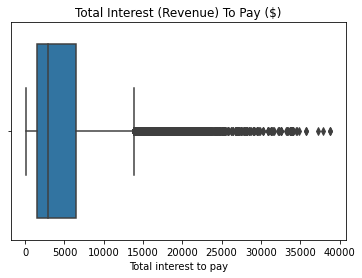

In [69]:
# Summary statistics of expected revenue
ax = sns.boxplot(x = df['Total interest to pay']).set_title('Total Interest (Revenue) To Pay ($)')

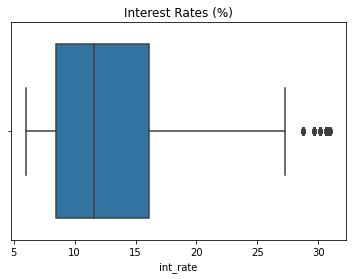

In [70]:
# Summary statistics of interest rates
ax = sns.boxplot(x = df['int_rate']).set_title('Interest Rates (%)')

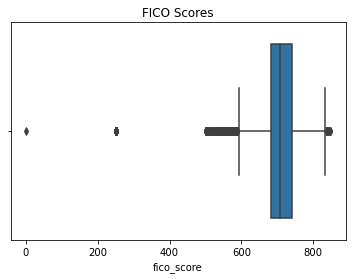

In [71]:
# Summary statistics of credit (FICO) scores
ax = sns.boxplot(x = df['fico_score']).set_title('FICO Scores')

Total expected revenue is 295 million, with an IQR of 1,447 to 6,420 -- median value of 2,960.

Interest rate IQR is 8.48% to 16.14% -- median value of 11.55% (low-med interest)

FICO score IQR is 682 to 742 -- median value of 742 (good credit)

## New group segmentation by FICO score and interest rates

With the new groups created, it is time to see how the different borrowers are contributing to LT's revenue.

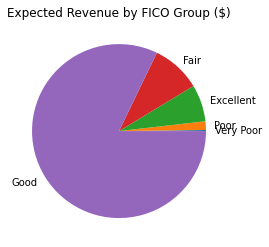

In [46]:
# Each FICO group's contribution to expected revenue ($)
FICO_revenue = df.groupby('FICO_code')['Total interest to pay'].sum().sort_values()
FICO_revenue.plot(kind = "pie", title = "Expected Revenue by FICO Group ($)", label = "")

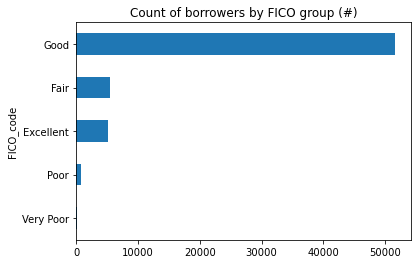

In [47]:
# Each FICO group's number of borrowers (#)
Interest_count = df.groupby('FICO_code')['Total interest to pay'].count().sort_values()
Interest_count.plot(kind = 'barh', title = "Count of borrowers by FICO group (#)", label = "")

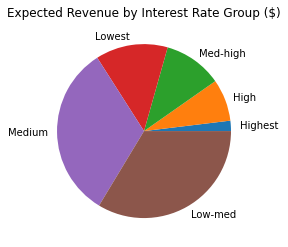

In [48]:
# Each Interest group's contribution to expected revenue ($)
Interest_revenue = df.groupby('Interest_code')['Total interest to pay'].sum().sort_values()
Interest_revenue.plot(kind = "pie", title = "Expected Revenue by Interest Rate Group ($)", label = "")

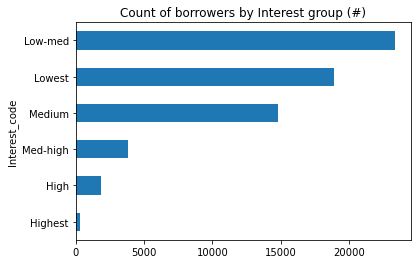

In [49]:
# Each Interest group's number of borrowers (#)
Interest_count = df.groupby('Interest_code')['Total interest to pay'].count().sort_values()
Interest_count.plot(kind = 'barh', title = "Count of borrowers by Interest group (#)", label = "")

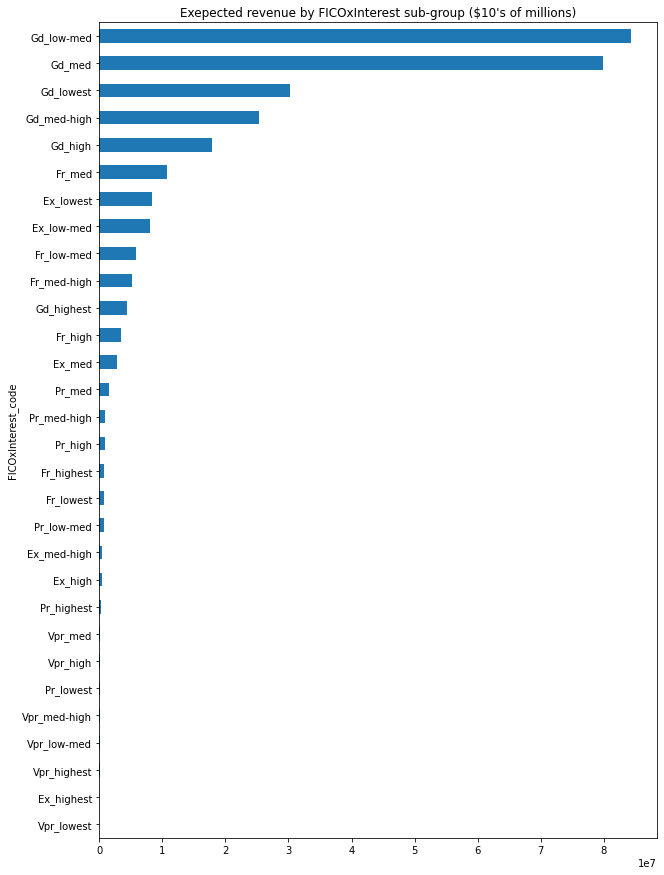

In [50]:
# Each FICOxInterest sub-group's contribution to revenue($)
FICOxInterest_revenue = df.groupby('FICOxInterest_code')['Total interest to pay'].sum().sort_values()
FICOxInterest_revenue.plot(kind = 'barh', title = "Exepected revenue by FICOxInterest sub-group ($10's of millions)", figsize=(10,15), label = "")

## Insights

From the analysis above, it's clear that good credit borrowers are not only the biggest group, but also the predominant group with over 80% of revenue and borrowers. This particular group (good credit) should be examined more closely.

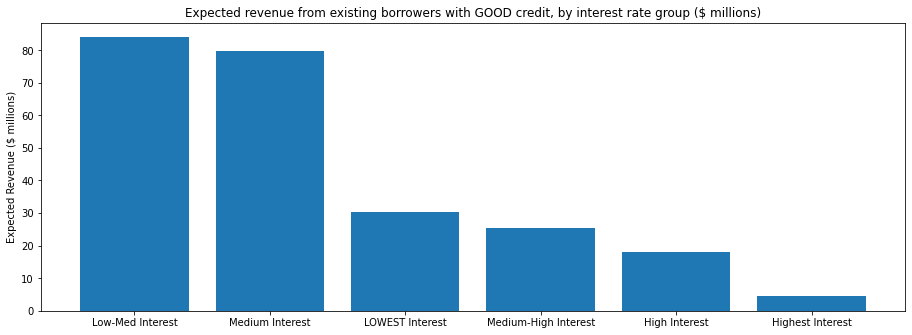

In [55]:
# Good credit is by far the largest contributor, so let's take a closer look at Good credit borrowers by segmenting them by the interest they pay
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
GoodxInterest_vars = ['Low-Med Interest', 'Medium Interest', 'LOWEST Interest', 'Medium-High Interest', 'High Interest', 'Highest Interest']
GoodxInterest_values = [84.2, 79.8, 30.3, 25.3, 18.0, 4.4]
ax.bar(GoodxInterest_vars, GoodxInterest_values)
ax.set_ylabel('Expected Revenue ($ millions)')
plt.title('Expected revenue from existing borrowers with GOOD credit, by interest rate group ($ millions)')
plt.show()

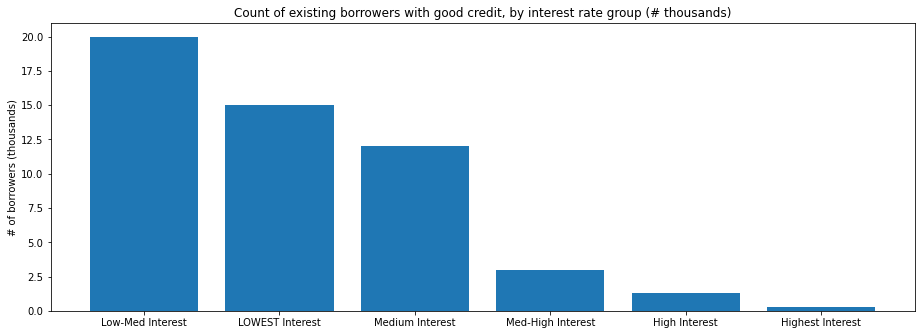

In [56]:
# Let's see how many Good credit borrowers there are, by interest rate group
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
GoodxInterest_vars = ['Low-Med Interest', 'LOWEST Interest', 'Medium Interest', 'Med-High Interest', 'High Interest', 'Highest Interest']
GoodxInterest_count = [20, 15, 12, 3, 1.3, 0.25]
ax.bar(GoodxInterest_vars, GoodxInterest_count)
ax.set_ylabel('# of borrowers (thousands)')
plt.title('Count of existing borrowers with good credit, by interest rate group (# thousands)')
plt.show()

In [76]:
# Finally, let's see what the revenue per person (RPP) is for Good credit borrowers.
data = {'Interest Rate Group': ['Lowest', 'Low-Med', 'Medium', 'Med-High', 'High', 'Highest'],
        'RPP ($)': [2091, 4242, 6434, 8349, 12696, 17090]
    }
table = pd.DataFrame(data, columns = ['Interest Rate Group', 'RPP ($)'])
title = 'test'
print(table)

  Interest Rate Group  RPP ($)
0              Lowest     2091
1             Low-Med     4242
2              Medium     6434
3            Med-High     8349
4                High    12696
5             Highest    17090


Zooming in on good credit borrowers by differentiating them by interest rate groups, we can see that the 15 thousand people paying the lowest interest rate account for 30% of borrowers, but only 12.5% of revenue. On the other hand, good-credit borrowers paying medium interest rates are fewer in number (12 thousand), but account for more than double the revenue of the lowest interest group.

As a result, it is clear there is an opportunity to increase revenue by moving or replacing good credit-low interest borrowers towards or with good credit-low-med interest borrowers.

Looking at the revenue per person (RPP), we will have a metric to use to calculate how many borrowers need to go where. Since the target is 3% revenue growth representing some $8.8 million,

## Options

<b>Option 1: Inorganic Growth</b>

For all new, prospective borrowers with good credit (FICO score of 660 to 780), offer interest rates that start at low-medium interest and above -- depending on where the borrower falls on the scale between 660 and 780.

<b>Option 2: Organic Growth</b>

For existing borrowers with good credit that want to roll over their current loans or take out new loans, offer them interest rates at the next tier above.
* For example, a borrower paying "medium" interest should be offered "medium-high" interest in the new loan.

Given the preceding analysis and the relative revenue underperformance by good-credit borrowers paying the lowest interest, priority should be given to transitioning their next loans into "low-medium" interest. 

In [83]:
# Option 1: The number of new borrowers needed to achieve 3% revenue growth
# Number of new good credit borrowers required in their respective interest rate band to achieve 3% overall revenue growth
data1 = {'Interest Rate Group': ['New to Low-Med', 'New to Medium', 'New to Med-High', 'New to High', 'New to Highest'],
        'Number': [2083, 1347, 1059, 696, 517]
    }
table1 = pd.DataFrame(data1, columns = ['Interest Rate Group', 'Number'])
print(table1)

  Interest Rate Group  Number
0      New to Low-Med    2083
1       New to Medium    1347
2     New to Med-High    1059
3         New to High     696
4      New to Highest     517


In [85]:
# Option 2: The number of existing borrowers that need to be moved one level higher in their interest band to achieve 3% revenue growth
# This table shows, for each interest rate group, how many customers would need to be converted from the group below it to acheive 3% revenue growth.

data2 = {'Interest Rate Group': ['Move to Low-Med', 'Move to Medium', 'Move to Med-High', 'Move to High', 'Move to Highest'],
        'Number': [4109, 4032, 4615, 2033, 2011]
    }
table2 = pd.DataFrame(data2, columns = ['Interest Rate Group', 'Number'])
print(table2)

  Interest Rate Group  Number
0     Move to Low-Med    4109
1      Move to Medium    4032
2    Move to Med-High    4615
3        Move to High    2033
4     Move to Highest    2011
